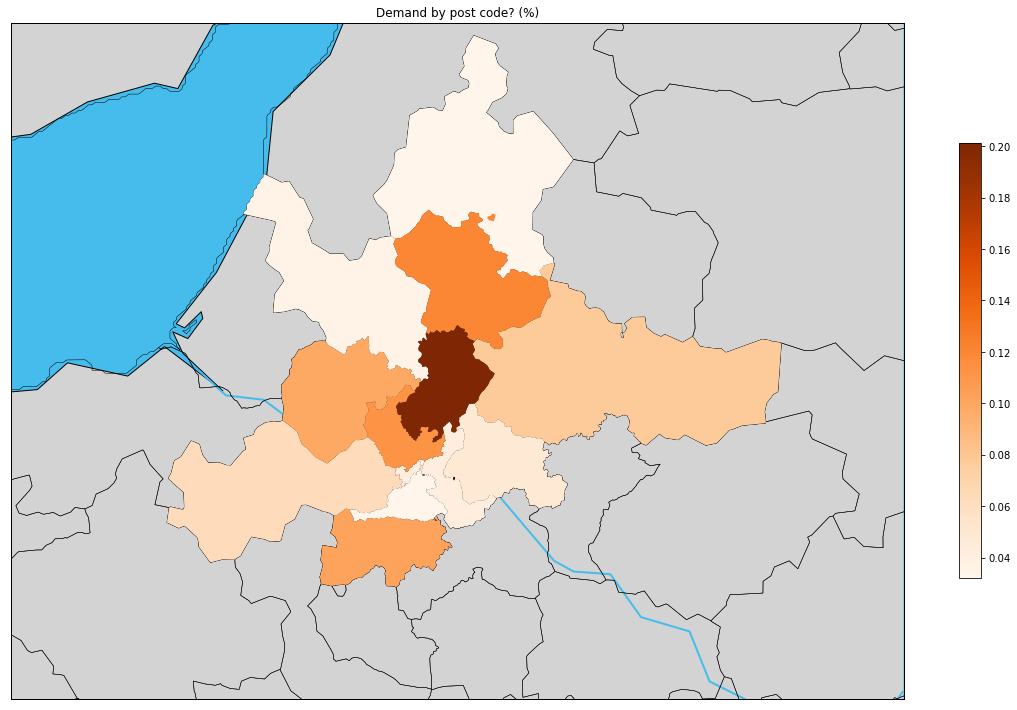

In [6]:
#Allows to visualize plots in jupyter

%matplotlib inline

#import of libraries
import pyglet
import geoplotlib
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import matplotlib.cm
import numpy as np
from geoplotlib.utils import BoundingBox
import geoplotlib

#import of data set

slide_data = pd.read_csv('C:\\Users\\i\\Desktop\\Data science\\First_python_visualisation\\geo_data_slide.csv')
zip_codes_percent = pd.read_csv('C:\\Users\\i\\Desktop\\Data science\\First_python_visualisation\\percentage_by_area.csv')
zip_codes_percent['Value'] = pd.to_numeric(zip_codes_percent['Value'], errors='coerce')

# creation of map template 

f, ax = plt.subplots(figsize=(20,20))

#Reading shapefile
map = Basemap(projection='merc', llcrnrlat=51.39, urcrnrlat=51.6,
        llcrnrlon=-2.795, urcrnrlon=-2.35,resolution='h')

map.drawcoastlines()
map.fillcontinents (color='lightgray', lake_color='lightblue')
map.drawmapboundary(fill_color='#46bcec')
map.shadedrelief()
map.drawrivers(linewidth=2,color='#46bcec')

#Reading shapefile
map.readshapefile('C:\\Users\\i\\Desktop\\Data science\First_python_visualisation\\sectors_bristol\\Districts','district')

#Joining shape file and figure by district + filtering on Bristol values

df_poly = pd.DataFrame({
    'Shapes':[Polygon(np.array(shape),True) for shape in map.district],
    'area': [area['name'] for area in map.district_info]
})
df_poly = df_poly.merge(zip_codes_percent, on='area', how='left')
df_poly_filtered = df_poly.dropna(axis=0)

#Plotting the colors 

cmap = plt.get_cmap('Oranges')
pc = PatchCollection(df_poly_filtered.Shapes, zorder=2)
norm = Normalize()
 
pc.set_facecolor(cmap(norm(df_poly_filtered['Value'].fillna(0).values)))
ax.add_collection(pc)

#add color bar
mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
 
mapper.set_array(df_poly_filtered['Value'])
plt.colorbar(mapper, shrink=0.4)
       
plt.title('Demand by post code? (%)')